In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
movies_df = pd.read_csv('boxOffice.csv')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   Rank                      1000 non-null   object
 2   Title                     1000 non-null   object
 3   Worldwide Lifetime Gross  1000 non-null   object
 4   Domestic Lifetime Gross   1000 non-null   object
 5   Domestic %                1000 non-null   object
 6   Foreign Lifetime Gross    1000 non-null   object
 7   Foreign %                 1000 non-null   object
 8   Year                      1000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [29]:
string_list = ['Worldwide Lifetime Gross', 'Domestic Lifetime Gross', 'Foreign Lifetime Gross', 'Domestic %', 'Foreign %', 'Rank' ]

for item in string_list:
    #movies_df = movies_df.replace({item: {'$':'', ',':'', '<':'' , '%':''}})
    movies_df[item] = movies_df[item].str.replace('$', '')
    movies_df[item] = movies_df[item].str.replace(',', '')
    movies_df[item] = movies_df[item].str.replace('<', '')
    movies_df[item] = movies_df[item].str.replace('%', '')
    
movies_df = movies_df.replace('-', '0')

for item in string_list:
    movies_df[item] = pd.to_numeric(movies_df[item])
movies_df.head()

/var/folders/qx/1rz3h6xs2gqfd_xlckhcw_yh0000gn/T/ipykernel_31736/2122264910.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_df[item] = movies_df[item].str.replace('$', '')


,Unnamed: 0,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,0,1,Avatar,2923706026,785221649,26.9,2138484377,73.1,2009
1,1,2,Avengers: Endgame,2799439100,858373000,30.7,1941066100,69.3,2019
2,2,3,Avatar: The Way of Water,2269892187,667830000,29.4,1602062187,70.6,2022
3,3,4,Titanic,2254343136,674067680,29.9,1580275456,70.1,1997
4,4,5,Star Wars: Episode VII - The Force Awakens,2071310218,936662225,45.2,1134647993,54.8,2015


In [41]:
#For the top 1000 box office movie numbers
#Trying to figure out where the majority of the money came from - either domestic or foreign

<AxesSubplot: xlabel='Year', ylabel='Worldwide Lifetime Gross'>

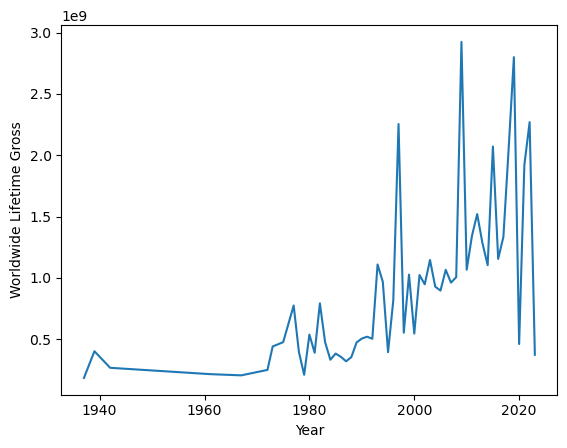

In [10]:
# How highest box office gross of each year 
highest_gross_Year =movies_df.loc[movies_df.groupby("Year")["Worldwide Lifetime Gross"].idxmax()]
sns.lineplot(data=highest_gross_Year, x="Year", y="Worldwide Lifetime Gross")

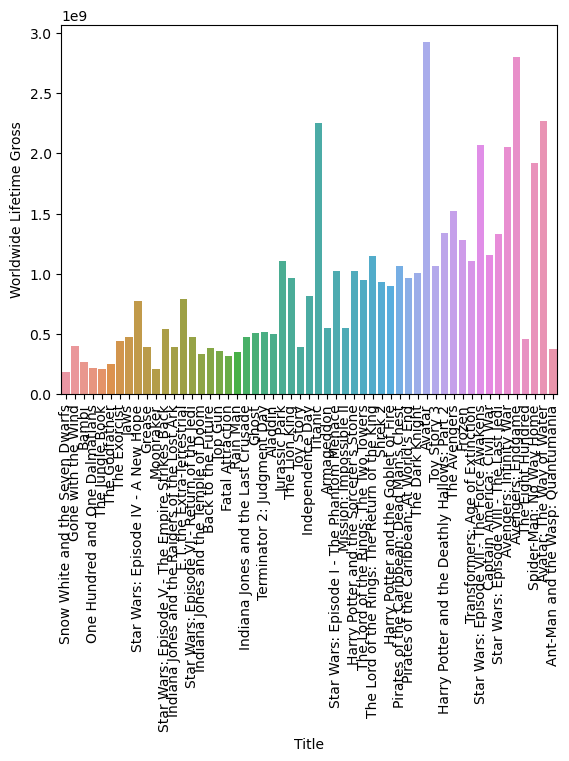

In [24]:
sns.barplot(data=highest_gross_Year, x="Title", y="Worldwide Lifetime Gross")
plt.xticks(rotation=90);

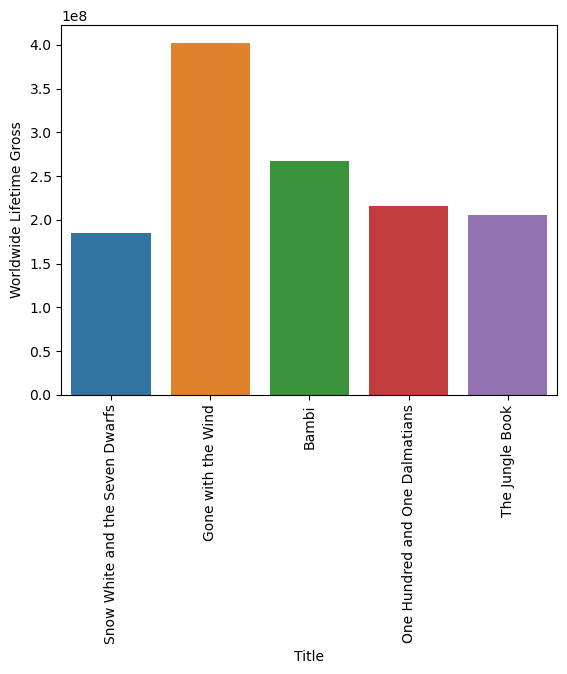

In [41]:
ax = sns.barplot(data=highest_gross_Year.head(5), x='Title', y='Worldwide Lifetime Gross')
#ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);